<a href="https://colab.research.google.com/github/aryansh007/MachineLearning/blob/main/gausian.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import dateutil.parser as dparser
from sklearn.cluster import KMeans

def del_duplicates(df):
  df = df.drop_duplicates(keep='last', inplace=False)
  app_data_df['Last Updated'] = pd.to_datetime(app_data_df['Last Updated'])
  df = df.sort_values(by=['App',  'Last Updated'], ascending=False)
  df = df.drop_duplicates(subset='App', keep='first', inplace=False)
  return df

#read dataset
app_data_df = pd.read_csv('googleplaystore.csv')

#Drop the abnormal row
app_data_df.drop(app_data_df[app_data_df['App'] == 'Life Made WI-Fi Touchscreen Photo Frame'].index, inplace=True)

#Delete all duplicate apps
app_data_df = del_duplicates(app_data_df)

#Drop the meaningless attributes
app_data_df = app_data_df[['Category', 'Rating', 'Reviews', 'Installs', 'Price']]

#Drop the rows with missing values
for row in app_data_df[app_data_df.isnull().any(axis=1)].index:
  app_data_df = app_data_df.drop(row)
app_data_df = app_data_df.reset_index(drop=True)

display(app_data_df)
#print(app_data_df['Installs'])

,Category,Rating,Reviews,Installs,Price
0,ENTERTAINMENT,4.7,11661,"1,000,000+",0
1,TOOLS,4.0,19,"10,000+",0
2,SOCIAL,4.6,22098,"1,000,000+",0
3,LIFESTYLE,3.8,718,"10,000+",$399.99
4,COMICS,4.4,190,"10,000+",0
...,...,...,...,...,...
8190,NEWS_AND_MAGAZINES,4.4,27,100+,0
8191,COMMUNICATION,4.7,573,"10,000+",0
8192,TOOLS,4.5,259,"10,000+",0
8193,COMICS,3.5,115,"10,000+",0


In [ ]:
#print(app_data_df['Installs'])
#app_data_df['Installs'] = app_data_df['Installs'].replace({'+',' '}, regex=True)
#app_data_df['Installs'] = app_data_df['Installs'].apply(lambda x: x.strip('+'))
#app_data_df['Installs'] = app_data_df['Installs'].apply(lambda x: x.strip(','))
app_data_df['Price'] = app_data_df['Price'].apply(lambda x: x.strip('$'))
#app_data_df['Price'] = app_data_df['Price'].replace({'$',' '}, regex=True)
#print(app_data_df['Installs'])
X = np.array(app_data_df[['Rating','Reviews','Price']])
#X[Installs] = X[Installs].replace({';',' '}, regex=True)
print(X)

[[4.7 '11661' '0']
 [4.0 '19' '0']
 [4.6 '22098' '0']
 ...
 [4.5 '259' '0']
 [3.5 '115' '0']
 [4.5 '40467' '0']]


/usr/local/lib/python3.6/dist-packages/sklearn/mixture/_base.py:267: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  % (init + 1), ConvergenceWarning)


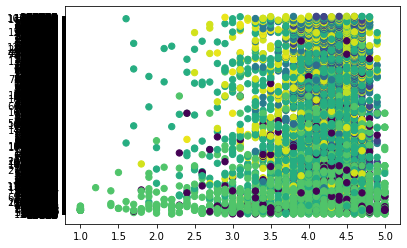

In [ ]:
from sklearn import mixture
gmm = mixture.GaussianMixture(n_components=30).fit(X)
labels = gmm.predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis');

In [ ]:
probs = gmm.predict_proba(X)
print(probs[:5].round(3))

[[0.    0.    0.    0.    0.    0.    0.012 0.    0.    0.    0.    0.
  0.2   0.    0.    0.    0.002 0.    0.    0.    0.    0.    0.    0.
  0.    0.    0.    0.786 0.    0.   ]
 [0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
  0.001 0.    0.    0.    0.    0.    0.046 0.    0.    0.949 0.    0.
  0.    0.    0.    0.004 0.    0.   ]
 [0.    0.    0.    0.    0.    0.    0.05  0.    0.    0.    0.    0.
  0.941 0.    0.    0.    0.007 0.    0.    0.001 0.    0.    0.    0.
  0.    0.    0.    0.002 0.    0.   ]
 [1.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
  0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
  0.    0.    0.    0.    0.    0.   ]
 [0.    0.    0.    0.    0.    0.    0.002 0.    0.    0.    0.    0.
  0.011 0.    0.    0.    0.    0.    0.917 0.    0.    0.    0.    0.
  0.    0.    0.    0.07  0.    0.   ]]


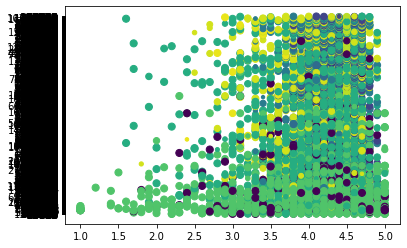

In [ ]:
size = 50 * probs.max(1) ** 2  # square emphasizes differences
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=size);